In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [13]:
import cdsapi

c = cdsapi.Client()

Available variables are

- 'alder_pollen'
- 'ammonia'
- 'birch_pollen'
-'carbon_monoxide'
- 'dust'
- 'formaldehyde'
- 'glyoxal'
- 'grass_pollen'
- 'mugwort_pollen'
- 'nitrogen_dioxide'
- 'nitrogen_monoxide'
- 'non_methane_vocs'
- 'olive_pollen'
- 'ozone'
- 'particulate_matter_10um'
- 'particulate_matter_2.5um'
- 'peroxyacyl_nitrates'
- 'pm10_sea_salt_dry'
- 'pm10_wildfires'
- 'pm2.5_total_organic_matter'
- 'ragweed_pollen'
- 'residential_elementary_carbon'
- 'secondary_inorganic_aerosol'
- 'sulphur_dioxide'
- 'total_elementary_carbon',


In [14]:
default_params = {
    "model": "ensemble",
    "date": "2024-05-26/2024-05-26",
    "format": "netcdf",
    "variable": "grass_pollen",
    "level": "0",
    "type": "forecast",
    "time": "00:00",
    "leadtime_hour": [
        "0",
        "1",
        "10",
        "11",
        "12",
        "13",
        "14",
        "15",
        "16",
        "17",
        "18",
        "19",
        "2",
        "20",
        "21",
        "22",
        "23",
        "3",
        "4",
        "5",
        "6",
        "7",
        "8",
        "9",
    ],
    "area": [
        45.82,
        4.66,
        45.67,
        4.92,
    ],
}

In [16]:
c.sleep_max = 10

In [17]:
# retreve the data of today and tomorrow
params = default_params.copy()
today = pd.Timestamp.now().date()
params["date"] = f"{today}/{today}"
params["leadtime_hour"] = [str(i) for i in range(48)]

filename = "./today_previsions.nc"
c.retrieve(
    "cams-europe-air-quality-forecasts",
    params,
    filename,
)

2024-05-26 15:20:20,904 INFO Welcome to the CDS
2024-05-26 15:20:20,906 INFO Sending request to https://ads.atmosphere.copernicus.eu/api/v2/resources/cams-europe-air-quality-forecasts
2024-05-26 15:20:20,949 INFO Request is queued
2024-05-26 15:20:21,979 INFO Request is running
2024-05-26 15:20:29,199 INFO Request is completed
2024-05-26 15:20:29,200 INFO Downloading https://download-0002-ads-clone.copernicus-climate.eu/cache-compute-0002/cache/data5/adaptor.cams_regional_fc.retrieve-1716736828.2077668-27766-7-d0e7f02a-8829-481c-b3d0-be87f9036c86.nc to ./today_previsions.nc (1.8K)
2024-05-26 15:20:29,384 INFO Download rate 9.7K/s


Result(content_length=1808,content_type=application/x-netcdf,location=https://download-0002-ads-clone.copernicus-climate.eu/cache-compute-0002/cache/data5/adaptor.cams_regional_fc.retrieve-1716736828.2077668-27766-7-d0e7f02a-8829-481c-b3d0-be87f9036c86.nc)

In [18]:
# retrereve the historical data of 2023
params = default_params.copy()
params["date"] = "2023-03-01/2023-09-30"
params["leadtime_hour"] = [str(i) for i in range(23)]
filename_2023 = "./2023_previsions.nc"
c.retrieve(
    "cams-europe-air-quality-forecasts",
    params,
    filename_2023,
)

2024-05-26 15:23:02,347 INFO Welcome to the CDS
2024-05-26 15:23:02,348 INFO Sending request to https://ads.atmosphere.copernicus.eu/api/v2/resources/cams-europe-air-quality-forecasts
2024-05-26 15:23:02,386 INFO Request is queued
2024-05-26 15:23:03,417 INFO Request is running
2024-05-26 15:35:26,087 INFO Request is completed
2024-05-26 15:35:26,088 INFO Downloading https://download-0002-ads-clone.copernicus-climate.eu/cache-compute-0002/cache/data8/adaptor.cams_regional_fc.retrieve-1716737717.3148544-27507-8-9543018a-99a6-431d-b891-f4fbaf35dd77.nc to ./2023_previsions.nc (58.9K)
2024-05-26 15:35:26,299 INFO Download rate 279.7K/s


Result(content_length=60312,content_type=application/x-netcdf,location=https://download-0002-ads-clone.copernicus-climate.eu/cache-compute-0002/cache/data8/adaptor.cams_regional_fc.retrieve-1716737717.3148544-27507-8-9543018a-99a6-431d-b891-f4fbaf35dd77.nc)

In [19]:
filename_2023 = "./2023_previsions_history.nc"
filename_2024 = filename

In [20]:
ds_2023 = xr.open_dataset(filename_2023)
ds_2023

<xarray.Dataset> Size: 71kB
Dimensions:    (longitude: 2, latitude: 1, level: 1, time: 4440)
Coordinates:
  * longitude  (longitude) float32 8B 4.75 4.85
  * latitude   (latitude) float32 4B 45.75
  * level      (level) float32 4B 0.0
  * time       (time) timedelta64[ns] 36kB 00:00:00 ... 184 days 23:00:00
Data variables:
    gpg_conc   (time, level, latitude, longitude) float32 36kB ...
Attributes:
    title:        GRASSPOLLEN Air Pollutant FORECAST at the Surface
    institution:  Data produced by Meteo France
    source:       Data from ENSEMBLE model
    history:      Model ENSEMBLE FORECAST
    FORECAST:     Europe, 20230301-20230901+[0H_23H]
    summary:      ENSEMBLE model hourly FORECAST of GRASSPOLLEN concentration...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)

In [21]:
mean_gpg_2023 = ds_2023.mean(
    dim=["latitude", "longitude", "level"]
).gpg_conc.to_dataframe()
start_date = "2023-03-01"
mean_gpg_2023.index += pd.Timestamp(start_date)

<Axes: xlabel='time'>

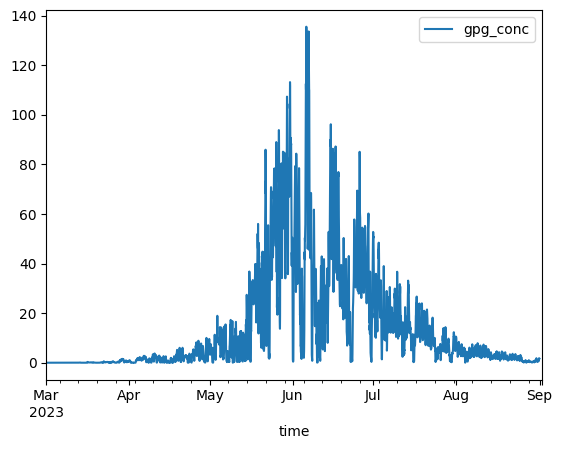

In [22]:
mean_gpg_2023.plot()

In [8]:
ds_2024 = xr.open_dataset(filename_2024)
mean_gpg_2024 = ds_2024.mean(
    dim=["latitude", "longitude", "level"]
).gpg_conc.to_dataframe()
start_date = "2024-05-26"
mean_gpg_2024.index += pd.Timestamp(start_date)
mean_gpg_2024_in_2023 = mean_gpg_2024.copy()
mean_gpg_2024_in_2023.index = mean_gpg_2024.index - pd.DateOffset(years=1)

<Axes: xlabel='time'>

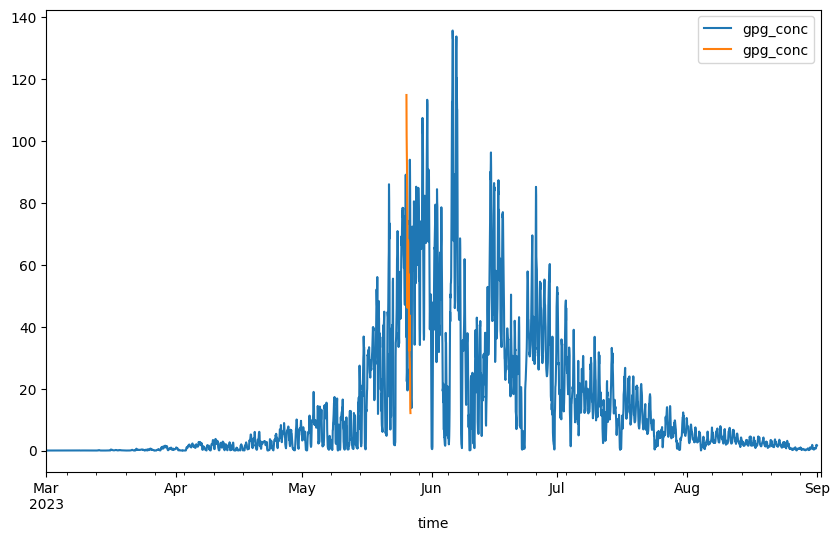

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
mean_gpg_2023.plot(ax=ax, label="2023")
mean_gpg_2024_in_2023.plot(ax=ax, label="2024")

In [10]:
mean_gpg_2024_in_2023

,gpg_conc
time,
2023-05-26 00:00:00,114.715027
2023-05-26 01:00:00,101.935577
2023-05-26 02:00:00,96.485657
2023-05-26 03:00:00,92.211205
2023-05-26 04:00:00,82.079613
2023-05-26 05:00:00,75.430229
2023-05-26 06:00:00,46.064713
2023-05-26 07:00:00,55.985382
2023-05-26 08:00:00,61.319000
